# Assiginment 2 - Set 6 _ Wheat seed dataset

Group Details :

Group No : 244

Group Members : Rutika Bandu Sonak , Shailesh S G , Siddharth Jain

Contribution : Equal by all 3 members

# Import the required libraries

In [ ]:
#Importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



# 1] **Data Visualization and Exploration**

In [ ]:
# Importing dataset
path="https://raw.githubusercontent.com/snakessilver/Wheat-seed-classification/main/seed_seed.csv"
df = pd.read_csv(path)

In [ ]:
# Displaying first 2 lines of the dataset
df.head(2)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


In [ ]:
# Displaying the number of columns and the column names in the dataset
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width',
       'Asymmetry.Coeff', 'Kernel.Groove', 'Type'],
      dtype='object')

In [ ]:
# Displying the statistical details of the dataset
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


From the above output we can understand the count of values , the mean values , the standard deviation, minimum values, maximun values and the three quartile values for various columns. From the 3 quartile values of all the columns we can say that the quartile values are quite near to each other i.e. there is less differnce between them so the data points are also near to each other.

In [ ]:
# Displaying the number of rows and columns in dataset.(rows,coulmns)
df.shape

(199, 8)

In [ ]:
# displaying summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Info() is used to get a quick overview of the dataset. We can see in the output, the summary includes list of all columns with their data types, the number of non-null values in each column , memory usage, etc.

*  Checking for class imbalance

In [ ]:
df["Type"].value_counts() / len(df) * 100 

2    34.170854
1    33.165829
3    32.663317
Name: Type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


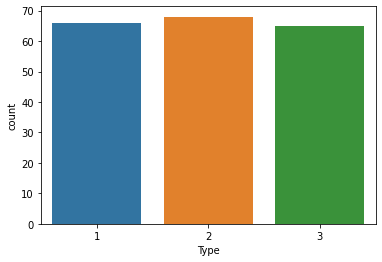

In [ ]:
sns.countplot(df['Type'])

In [ ]:
# checking for class imbalance
df["Type"].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

The number of data points all the three types of classes almost same i.e. the difference is very less so we can say that the classes are not imbalanced.

* Visualization to get the insights of the data

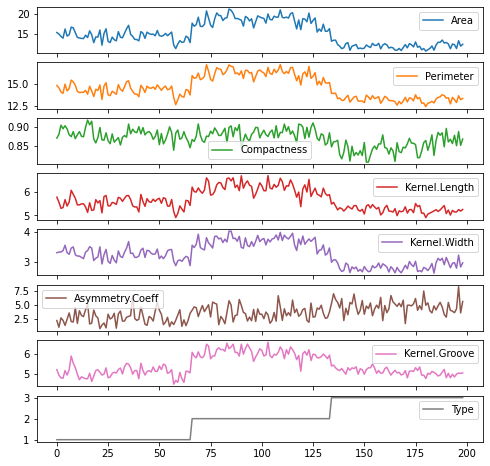

In [ ]:
# Column wise line graphs
df.plot(subplots=True, figsize=(8, 8));

The above line graph helps understand how the values are varying across each column in dataset.

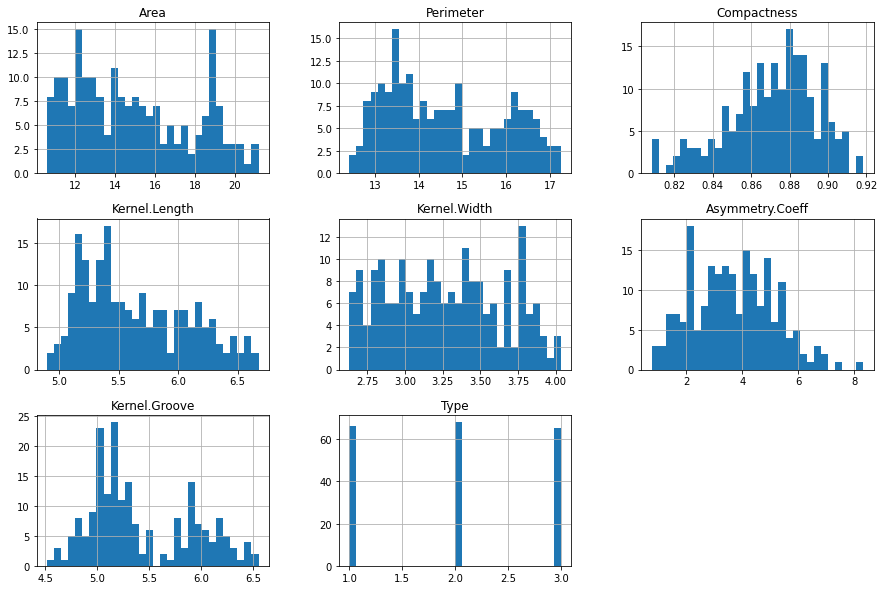

In [ ]:
# Column wise histogram
df.hist(bins=30, figsize=(15, 10));

A histogram shows how frequently a value falls into a particular bin. The height of each bar represents the number of values in the data set that fall within a particular bin. for eaxmple in or data we can see that in "Perimeter" column maximum values fall between 13 and 14 and in "kernel.groove" column max values fall between 5 and 5.5.

* Doing correlation analysis on dataset

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

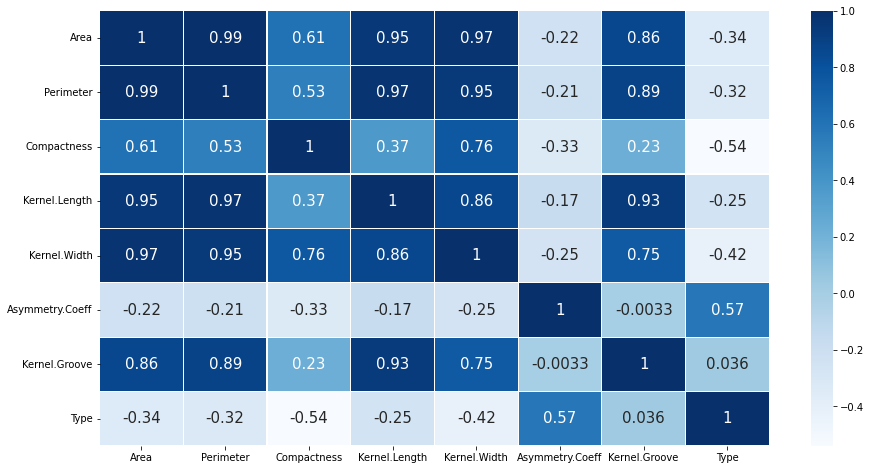

In [ ]:
# Performing correlation analysis
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 15})
plt.yticks(rotation=0)

The above heatmap shows R(correlation coefficient) values for all the features.
The heat map suggests that the cells that are darker in color are highly correlated and so have high R values. If the features are highly corrrelated too each other then one of them has to be removed to reduce the complexity,to reduce chances of errors, for better computaional speed ,etc.

Considering the limit to be 0.95, we can conclude from heatmap:
* Area is highly correlated to Perimeter, Kernel.Length, and Kernel width
* Perimeter is highly correlated to Area, Kernel.Length, and Kernel width
* Kernel.Length and Kernel.width is highly correlated to Area and perimeter
So we can conclude that the columns to be dropped will be ('Perimeter', 'Kernel.Length', 'Kernel.Width')
Thus, we can say that correlation analysis does affect feature selection.

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.99
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
print(to_drop)

['Perimeter']


In [ ]:
# Dropping columns based on the conclusions drawn by correlation analysis done above
df.drop(['Perimeter'], axis=1, inplace=True)

In [ ]:
# Dataframe after dropping columns
df

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...
194,12.19,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,0.8521,5.175,2.836,3.598,5.044,3


# 2] **Data Pre-processing and cleaning**


* Checking for NULL or missing values

In [ ]:
df.isnull().sum()

Area               0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

> The data does not have any NULL or missing values.

>  **Class Imbalance : Since as checked in data visualisation step the data is not imbalance hence we donot need to do any processing for this step.**


* Outlier analysis

In [ ]:
def show_outliers(df):
    # boxplot will show the outliers in Q1 , Q3 , IQR and outliers
    plt.figure(figsize=(25,10))
    sns.boxplot(data=df, width=0.22)

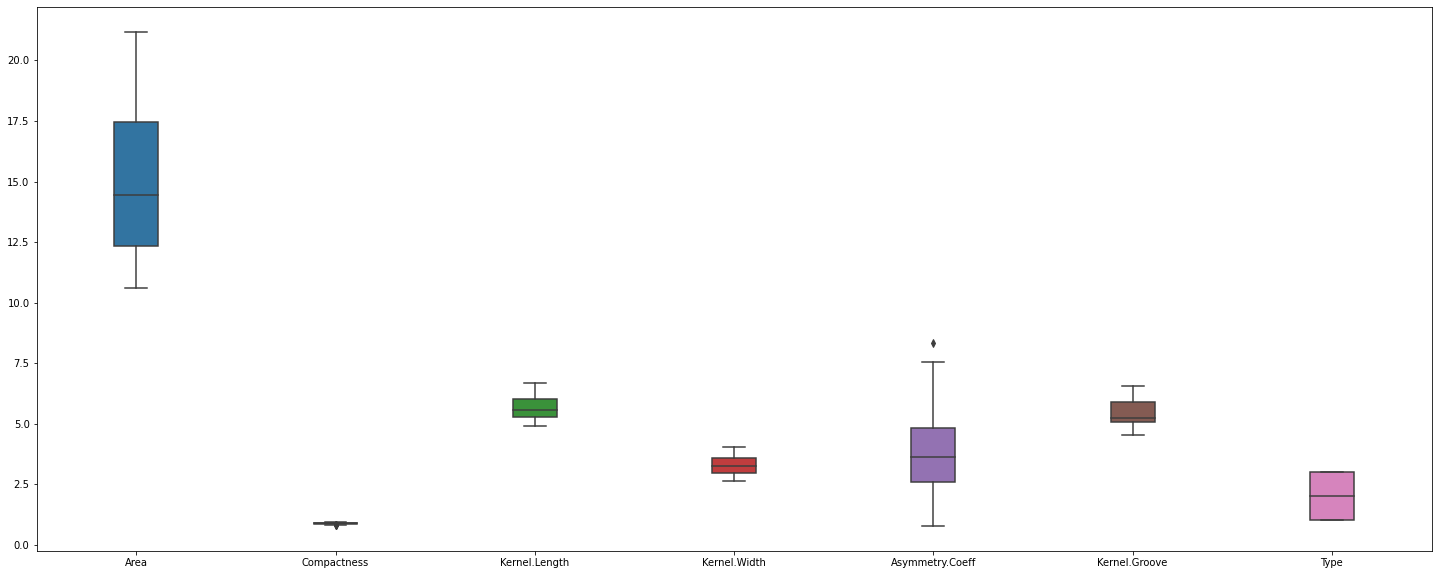

In [ ]:
# show the outliers and then decide and remove them
show_outliers(df)


We can observe from above output that "Asymmetry.Coeff" column has an outlier.

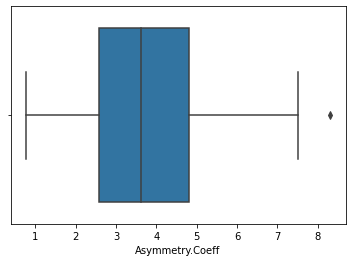

In [ ]:
# Getting a closer look at the outlier
sns.boxplot(x=df['Asymmetry.Coeff'])

In [ ]:
# Removing the outlier
def identify_outliers(data, featureName):
    mean = np.mean(data[featureName])
    stddev = np.std(data[featureName])
    indices = []
    for index, value in data[featureName].iteritems():
        z_score = (value - mean) / stddev
        if abs(z_score) > 3:
            indices.append(index)
    return indices

In [ ]:
Asymmetry_Coeff_outlier = identify_outliers(df, 'Asymmetry.Coeff')
df.drop(Asymmetry_Coeff_outlier, inplace=True)
print(Asymmetry_Coeff_outlier)
print('Total outliers removed are {}'.format(len(Asymmetry_Coeff_outlier)))

[196]
Total outliers removed are 1


* Checking for skewness

In [ ]:
df.skew(axis = 0, skipna = True)

Area               0.365466
Compactness       -0.522087
Kernel.Length      0.492092
Kernel.Width       0.116817
Asymmetry.Coeff    0.168787
Kernel.Groove      0.527182
Type               0.018553
dtype: float64

The skewness value for column "Compactness" is negative which means that there is asymmetry in the distribution corresponding to this column and the tail is larger towards the left hand side of the distribution. Also the skewness values for columns "Area","Asymmetry.Coeff","Kernel.Groove" and "Type" are positive so we can say that there is asymmetry in the distribution corresponding to these columns and the tail is larger towards the right hand side of the distribution. **bold text**

* Normalization

For normalization, we used MinMaxScaler - to bring the data of each feature in a similar base range. This helps in better model estimations.

In [ ]:
df = df.astype(float)
cols = [
    "Area","Compactness","Kernel.Length","Kernel.Width","Asymmetry.Coeff","Kernel.Groove"
]

scaler = MinMaxScaler()
# transform data
df[cols] = scaler.fit_transform(df[cols])

In [ ]:
df.head()

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,0.440982,0.570780,0.486486,0.486101,0.215405,0.345150,1.0
1,0.405099,0.662432,0.368806,0.501069,0.037417,0.215165,1.0
2,0.349386,0.879310,0.220721,0.503920,0.286126,0.150665,1.0
3,0.306893,0.793103,0.239302,0.533856,0.221027,0.140817,1.0
4,0.524079,0.864791,0.427365,0.664291,0.087278,0.322994,1.0


In [ ]:
df.describe()

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.409577,0.568260,0.420162,0.453102,0.430663,0.444852,1.989899
std,0.276185,0.211849,0.249868,0.270330,0.212684,0.242875,0.812278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.162890,0.442831,0.208756,0.230756,0.265783,0.259478,1.000000
50%,0.364023,0.589837,0.362613,0.442979,0.423131,0.349828,2.000000
75%,0.652738,0.712114,0.622185,0.666607,0.592352,0.669621,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# 3] **Model Building**


Getting the X and y axis data for test data preparation

In [ ]:
X = df.iloc[:,0:6]
y = df['Type']


In [ ]:
X.head(2)

,Area,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.440982,0.570780,0.486486,0.486101,0.215405,0.345150
1,0.405099,0.662432,0.368806,0.501069,0.037417,0.215165


In [ ]:
y.head(2)

0    1.0
1    1.0
Name: Type, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

Splitting the dataset into training and test datasets with percentage allocation as :
Train = 80% [ x_train1,y_train1] = 80%     
Test = 20% [ x_test1,y_test1] = 20% ;

This train_test_split method will return a tuple with two DataFrames containing the training and testing data set.

Building Models One by One . First Decision Tree Classifier and then KNN .

# **Decision Tree Classifier Model**

Decision Tree - It has many parameters to choose to decide which is best fit for a given dataset. 
Example of parameters to choose are:
 

1.   Best Split (Function to measure the quality of a split ) : Gini / Entropy 
Default being Gini in below sklearn.DecisionTreeClassifier

2.   max_depth:  maximum depth of tree for which split has to be carried out . It can lead to overfitting if we choose to high value.

3. min_samples_split : minium smaples required to split the internal nodes . Default 2 . This is used to control over fitting but way too high lead to under fitting .

4. min_samples_leaf : minimum number of samples required to be at a leaf node . Default is 1 . This is also used to control over fitting by creating way too many small branches

Similarly we have many other parameters like min_weight_fraction_leaf , max_features, min_impurity_decrease etc . For our case we will try to find the best parameters by considering best_split , max_depth , min_sample_split, min_samples_leaf and keeping the randomness value same across .


Let's first try decision tree with default hyperparameters, apart from max_depth which is 2 . Just considering it for example , we shall tune it later. 

In [ ]:
decision_tree_clf = DecisionTreeClassifier(max_depth=2)
decision_tree_clf.fit(X_train, y_train)
y_train_pred = decision_tree_clf.predict(X_train)
y_test_pred = decision_tree_clf.predict(X_test)


In [ ]:
# Below is accuracy score of default hyper parameters decision tree  classifier on train and test data . 
# We can use these to compare with best parameter decision tree classifier result.
print("Accuracy score for Default DecisionTreeClassifier on train data: ", accuracy_score(y_train, y_train_pred) * 100)
print("Accuracy score for Default DecisionTreeClassifier on test  data", accuracy_score(y_test, y_test_pred) * 100)


Accuracy score for Default DecisionTreeClassifier on train data:  93.67088607594937
Accuracy score for Default DecisionTreeClassifier on test  data 87.5


**Finding Best DecisionTree Parameters** 

Tunning/Finding the best parameters like max_depth , best_fit(gini/entropy) , min_samples_leaf to improve accuracy and to avoid over and under fitting.
For these we will consider a sample hyper params list by picking the data in different data ranges and run different permutations on it. We should ideally have values in range list(range(1,len(X))) . But these values will consume lot of machine power and many combinations , hence we will randomanly pick certain values and try to find best fit parameters

In [ ]:
# Sample parameter's based with different max_depth , min_samples_leaf and best_split function of gini or entropy. 
sample_hyper_params = {
    'max_depth': [2, 3, 5, 6],
    'min_samples_leaf': [1, 4, 5, 6],
    'criterion': ["gini", "entropy"]
}

In [ ]:
decision_tree_clf = DecisionTreeClassifier()

# As we can see there are various combinations we need to try so as to arrive at best parameter combination giving highest accuracy . 
# Hence to solve this we shall use GridSearchCV. This will help us with trying different combinations .
# GridSearchCV which will take the algo , sample parameters etc as inputs and gives the various results like mean_test_score with every possible hyper params.
grid_search = GridSearchCV(estimator=decision_tree_clf, 
                           param_grid=sample_hyper_params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 32 candidates, totalling 128 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6],
                         'min_samples_leaf': [1, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [ ]:
# Printing  accuracy score of best decision tree on train and test data . 
best_decision_classifier = grid_search.best_estimator_
best_decision_tree_parameters = grid_search.best_params_
print("Accuracy score for Best DecisionTreeClassifier on train data: ", accuracy_score(y_train, best_decision_classifier.predict(X_train)) * 100)
print("Accuracy score for Best DecisionTreeClassifier on test  data", accuracy_score(y_test, best_decision_classifier.predict(X_test)) * 100)
print(f'\033[1mThe Best Parameters for Best DecisionTreeClassifier are : {best_decision_tree_parameters} \033[0m')


Accuracy score for Best DecisionTreeClassifier on train data:  99.36708860759494
Accuracy score for Best DecisionTreeClassifier on test  data 90.0
The Best Parameters for Best DecisionTreeClassifier are : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1} 


**Justification for best parameters** : When we compare the accuracy score of default decision tree classifier and Accuracy score of best decision tree classifier , the accuracy of score has certainity increased for both test and train data example 6% on train data and 3% on test data . Hence we need to consider the above mentioned parameters as best parameters.

# **K-Nearest Neighbor(KNN)  Model**





1. Trying building the KNN Model with default parameters and then try to find the best parameters like example leaf_size, n_neighbors etc.

In [ ]:
#Create  Default KNN Model Object with default parameters.
knn = KNeighborsClassifier()
#Training the model.
knn.fit(X_train, y_train)
#Predict train data set.
y_train_pred = knn.predict(X_train)
#Predict test data set.
y_test_pred = knn.predict(X_test)


In [ ]:
# Below is accuracy score of default parameters KNN  classifier on train and test data . 
# We can use these to compare with best parameter KNN classifier result.
print("Accuracy score for Default KNN  Model on train data: ", accuracy_score(y_train, y_train_pred) * 100)
print("Accuracy score for Default KNN Modeal on test  data", accuracy_score(y_test, y_test_pred) * 100)


Accuracy score for Default KNN  Model on train data:  95.56962025316456
Accuracy score for Default KNN Modeal on test  data 90.0


As printed above is the accuracy score for default parameter knn model .
We can still improve the model performance, let's try to do that by Tuning / finding the best Hyperparameters like leaf_size, n_neighbors and p (p=1 means Manhattan distance and p=2 means Euclidean distance).

In [ ]:
# Sample parameter's based with different leaf_size , n_neighbors and p value ie  p=1 means Manhattan distance and p=2 means Euclidean distance. 
sample_knn_hyper_params = {
    'leaf_size': list(range(1,5)),
    'n_neighbors': list(range(1,5)),
    'p': [1,2]
}

In [ ]:
#Create new KNN object
knn_tree_classifier = KNeighborsClassifier()

# As we can see there are various combinations we need to try so as to arrive at best parameter combination giving highest accuracy . 
# Hence to solve this we shall use GridSearchCV. This will help us with trying different combinations .
# GridSearchCV which will take the algo , sample parameters etc as inputs and gives the various results like mean_test_score with every possible hyper params.
knn_grid_search = GridSearchCV(estimator=knn_tree_classifier, 
                           param_grid=sample_knn_hyper_params, 
                           cv=2, n_jobs=-1, verbose=1, scoring = "accuracy")
knn_grid_search.fit(X_train, y_train)



Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4], 'n_neighbors': [1, 2, 3, 4],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [ ]:
# Printing  accuracy score of best knn classifier on train and test data . 
best_knn_classifier = knn_grid_search.best_estimator_
best_knn_parameters = knn_grid_search.best_params_
print("Accuracy score for Best KNNClassifier on train data: ", accuracy_score(y_train, best_knn_classifier.predict(X_train)) * 100)
print("Accuracy score for Best KNNClassifier on test  data", accuracy_score(y_test, best_knn_classifier.predict(X_test)) * 100)
print(f'\033[1mThe Best Parameters for Best KNNClassifier are : {best_knn_parameters} \033[0m')


Accuracy score for Best KNNClassifier on train data:  96.83544303797468
Accuracy score for Best KNNClassifier on test  data 90.0
The Best Parameters for Best KNNClassifier are : {'leaf_size': 1, 'n_neighbors': 4, 'p': 1} 


**Justification for best parameters** : When we compare the accuracy score of default knn classifier and Accuracy score of best knn classifier , the accuracy of score has slightly increased for training data. 

From GridSearch, it can be seen that the best number of leaf_size is 1 while the optimal distance method is Manhattan or p = 1.
Then the most optimal number of K is 4.

# Performance Evaluation

In [ ]:
classifier_data={}
regularization_data = {}
list_training_error = []
list_testing_error = []


# Method to extract evaluation parameters for given test data and its predication result  
def extract_evaluation_parameters(y_test, predictions):
    """
    using following evaluation metrics
    Accuracy
    Precision
    Recall
    F1 Score
    Confusion Matrix

    to be computed from test data and predictions
    :param y_test:
    :param predictions:
    :return:
    """
    eval={}
   
    eval.__setitem__('accuracy % : ', accuracy_score(y_test, predictions) * 100)
    eval.__setitem__('precision % :', precision_score(y_test, predictions, average='macro') * 100)
    eval.__setitem__('recall % :', recall_score(y_test, predictions, average='macro') * 100)
    eval.__setitem__('f1_score % :', f1_score(y_test, predictions, average='macro')* 100)
    eval.__setitem__('confusion_matrix', confusion_matrix(y_test, predictions))
    df_eval=pd.DataFrame.from_dict(eval, orient='index')
    return df_eval

# Printing model evaluation results
def print_model_evaluation_results(classifier_data):
    # run evaluation metrics for each classification model.
    # Among the various run of classifications, we have kept the one which produced best accuracy. This selection criteria can be changed.
    for classifier in classifier_data:
        val = classifier_data.get(classifier)
        print("\n")
        print(f'{classifier} accuracy result on test data : ')
        print(val['evaluation_matrices'])
        print("Classification Report :\n")
        print(classification_report(val['y_test'], val['predictions']))



# Method to calculate regularize metrics for the predict score of a given model 
# Model sometimes can be overfitted or under fitted. 
# Hence we compute regularization matrices to help us reduce the over and under fitting problems
# Example Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 
def regularization_metrics(y_test, predictions):
    """
    Capture the Regularization Metrics for given test data
    """

    # calculate R^2 value, MAE, MSE, RMSE

    r_metrics = {}
    r_metrics['R2'] = r2_score(y_test, predictions)
    r_metrics['MAE'] = metrics.mean_absolute_error(y_test, predictions)
    r_metrics['MSE'] = metrics.mean_squared_error(y_test, predictions)
    r_metrics['RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, predictions))

    return r_metrics    

# We will run the model on test data and capturing both the results of DecisionTree and KNN classifiers
def run_model_on_test_data(model_type, X, y, train_index, test_index, classifier):
    global regularization_data
    # Prepare Train and Test data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Y_test : Predict the response for test dataset and Finding the accuracy score of the model
    y_test_predictions = classifier.predict(X_test)
    y_test_accuracy = round(accuracy_score(y_test, y_test_predictions), 5)

    eval_matrices = extract_evaluation_parameters(y_test, y_test_predictions)

    r_train_matrices = regularization_metrics(y_train, classifier.predict(X_train))
    r_test_matrices = regularization_metrics(y_test, y_test_predictions)

    reg_model_data = regularization_data.get(model_type) or {model_type:{}}
    list_training_error = reg_model_data.get('training_error') or []
    list_testing_error = reg_model_data.get('test_error') or []
    list_training_error.append(mean_absolute_error(y_train, classifier.predict(X_train)))
    list_testing_error.append(mean_absolute_error(y_test, y_test_predictions))
    reg_model_data['training_error'] = list_training_error
    reg_model_data['test_error'] = list_testing_error
    regularization_data[model_type] = reg_model_data

    #Storing the result of classfier with alpha which produces best accuracy 
    #Taking the worst accuracy model for Each Model Type
    if(model_type in classifier_data):
        if(classifier_data.get(model_type).get('accuracy') > y_test_accuracy ):
            classifier_data.update({model_type: {'classifier':classifier, 'accuracy':y_test_accuracy, 'evaluation_matrices': eval_matrices, 'r_test_metrics': r_test_matrices, 'y_test':y_test, 'predictions':y_test_predictions}})
    else:
        classifier_data.__setitem__(model_type, {'classifier':classifier, 'accuracy':y_test_accuracy, 'evaluation_matrices': eval_matrices, 'r_test_metrics': r_test_matrices, 'y_test':y_test, 'predictions':y_test_predictions})

    

In [ ]:
fold_size = 2
fold_no = 1
print('StratifiedShuffleSplit KFold With Train Size')
# Split into 2 folds with Test data = 20 % and Training Data = 80%
sss = StratifiedShuffleSplit(n_splits=fold_size, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(X, y):
  print('Fold Number: ', str(fold_no))
  run_model_on_test_data('DecisionTreeClassifier', X, y , train_index, test_index, best_decision_classifier)
  run_model_on_test_data('KNNClassifier', X, y , train_index, test_index,  best_knn_classifier)
  fold_no = fold_no + 1 
  print('\n')

StratifiedShuffleSplit KFold With Train Size
Fold Number:  1


Fold Number:  2




In [ ]:
print("Comparing the both the DecisionTreeClassifier and  KNNClassifier with evaluaton metrics")
print_model_evaluation_results(classifier_data)

Comparing the both the DecisionTreeClassifier and  KNNClassifier with evaluaton metrics


DecisionTreeClassifier accuracy result on test data : 
                                                     0
accuracy % :                                      95.0
precision % :                                95.396825
recall % :                                   94.871795
f1_score % :                                 94.838229
confusion_matrix  [[11, 1, 1], [0, 14, 0], [0, 0, 13]]
Classification Report :

              precision    recall  f1-score   support

         1.0       1.00      0.85      0.92        13
         2.0       0.93      1.00      0.97        14
         3.0       0.93      1.00      0.96        13

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



KNNClassifier accuracy result on test data : 
                                                    0
accuracy % :     

**Obseravtions:**
After multiple runs on test data and looking at the results of both classifiers. We can see that accuracy , precision , recall , f1_score of DecisionTree classifier is almost 7 % to 9 % better than KNN classifiers . Also considering all classes types , macro avg of DecisionTree is almost 10 % better than KNN . 

**Yes we can conclude for given data set , the DecisionTree Classifier is best**

# Underfitting/Overfitting/Just right model

To Understand Underfitting/OverFitting we will calculate the regularization metrics for the given model on both test and train data and see if the model is Underfitting or overfitting or just right . Regularisation matrices includes caculation of r2, mae,mse , rmse etc .  Here we consider example Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. This helps to understand if model is overfitting or underfitting . 


In [ ]:
def plot_mea_graph(model_type):
  plt.plot(range(1, fold_no),  np.array(regularization_data.get(model_type).get('training_error')).ravel(), 'o-', color='green', label='train')
  plt.plot(range(1, fold_no), np.array(regularization_data.get(model_type).get('test_error')).ravel(), 'o-', color='red', label='test')
  plt.xlabel(f'Number of folds_size({fold_no-1})')
  plt.ylabel('Mean Absolute Error')
  plt.title(f'For Model {model_type}: Training and Test error across folds')
  plt.show()


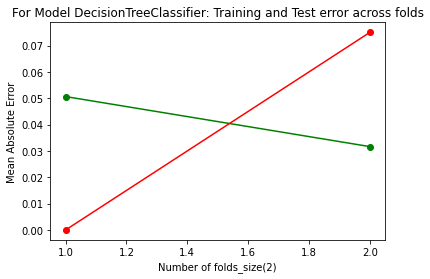

In [ ]:
plot_mea_graph('DecisionTreeClassifier')

**Observation of DecisionTreeClassifier MAE data** : DecisionTree Classifier
initially the MAE(Mean Absolute error) is more for training data and eventually decreases, which is sign of a good model - as the model learn it, it reduces the error.
further, the MAE was low for test data and increases eventually - which takes the model from good fit to over fit. This is because, after a point the MAE for training data is going down and smaller while MAE for test data is increasing and larger.
Still, the MAE range is near 0.1 which could be taken as acceptable range.
Thus, in conclusion, the model is good fit initially and move towards overfitting eventually.

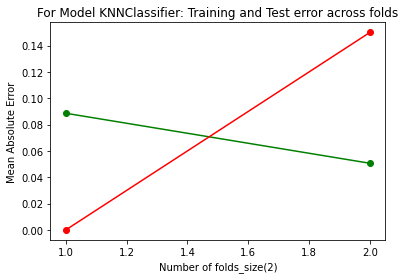

In [ ]:
plot_mea_graph('KNNClassifier')


**Observation of KNNClassifier MAE data** : KNN Classifier
initially the MAE(Mean Absolute error) is more for training data and eventually decreases, which is sign of a good model - as the model learn it, it reduces the error.
further, the MAE was low for test data and increases eventually - which takes the model from good fit to over fit. This is because, after a point the MAE for training data is going down and smaller while MAE for test data is increasing and larger.
Thus, in conclusion, the model is good fit initiall and move towards overfitting eventually.

In comparision between DecisionTre Classifier and KNN Classifier, the DecisionTree classifier fares well as the MAE is comparatively low and hence more promising.

# End of Assignment 